<a href="https://colab.research.google.com/github/zwt4pb/dsprojectjterm2/blob/main/popularwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Processing Justin Bieber's most popular song...
Song URL for Justin Bieber: https://genius.com/Justin-bieber-love-yourself-lyrics

Lyrics for Justin Bieber's most popular song:

[Verse 1]
For all the times that you rained on my parade
And all the clubs you get in using my name
You think you broke my heart, oh girl, for goodness' sake
You think I'm cryin' on my own, well, I ain't
[Refrain]
And I didn't wanna write a song
'Cause I didn't want anyone thinking I still care
I don't, but you still hit my phone up
And baby, I'll be movin' on
And I think you should be somethin' I don't wanna hold back
Maybe you should know that
[Pre-Chorus]
My mama don't like you and she likes 


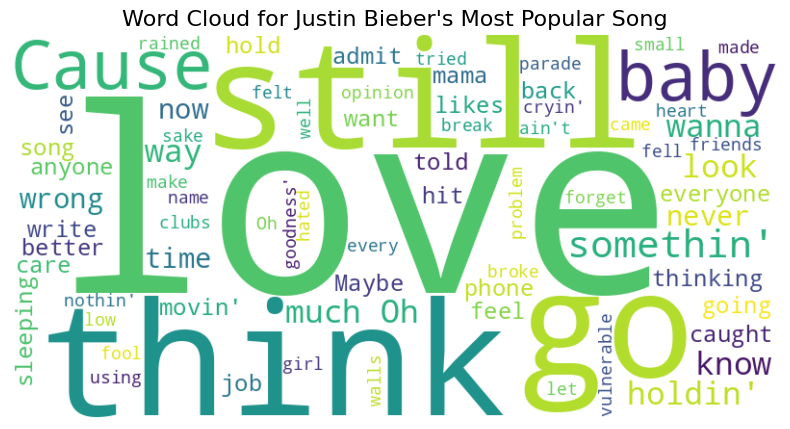


Processing Lady Gaga's most popular song...
Song URL for Lady Gaga: https://genius.com/Lady-gaga-and-bradley-cooper-shallow-lyrics

Lyrics for Lady Gaga's most popular song:

[Verse 1: Bradley Cooper]
Tell me somethin', girl
Are you happy in this modern world?
Or do you need more?
Is there somethin' else you're searchin' for?
[Refrain: Bradley Cooper]
I'm fallin'
In all the good times, I find myself longin'
For change
And, in the bad times, I fear myself
[Verse 2: Lady Gaga]
Tell me something, boy
Aren't you tired tryna fill that void?
Or do you need more?
Ain't it hard keepin' it so hardcore?
[Refrain: Lady Gaga]
I'm falling
In all the good times, I find myself long


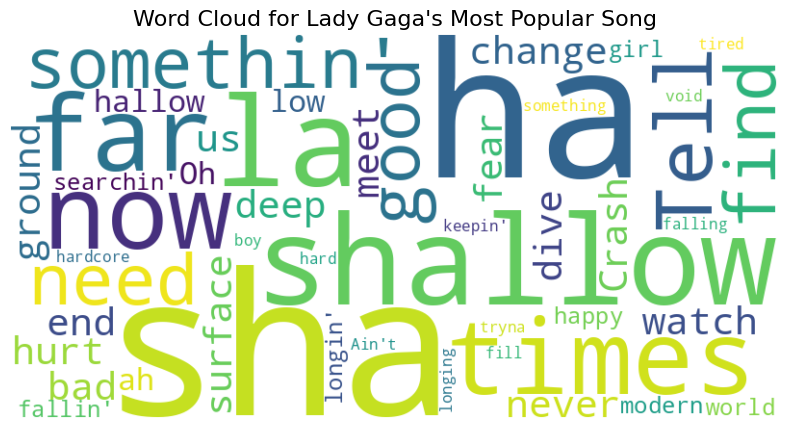


Processing The Weeknd's most popular song...
Song URL for The Weeknd: https://genius.com/The-weeknd-the-hills-lyrics

Lyrics for The Weeknd's most popular song:

[Intro]
Yeah
Yeah
Yeah
[Verse 1]
Your man on the road, he doin' promo
You said, "Keep our business on the low-low"
I'm just tryna get you out the friend zone
'Cause you look even better than the photos
I can't find your house, send me the info
Drivin' through the gated residential
Found out I was comin', sent your friends home
Keep on tryna hide it, but your friends know
[Chorus]
I only call you when it's half-past five
The only time that I'll be by your side
I only love it when you touch me, no


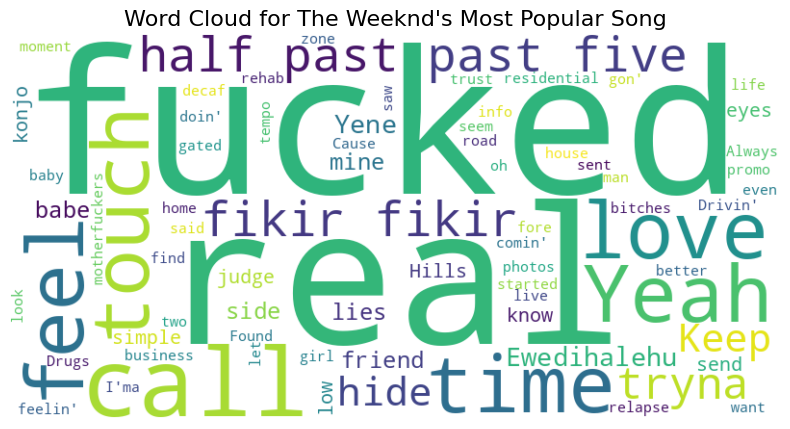

In [25]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
GENIUS_ACCESS_TOKEN = "Eg6bsX5D1UfDoP27tc3rBSmCwfm6a0maR680AwkKiFQDDe4brbD_u9Dd6WTdRYqU"

def get_song_url(artist_name):

    base_url = "https://api.genius.com"
    headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}
    search_url = f"{base_url}/search"
    params = {"q": artist_name}

    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        hits = data['response']['hits']
        for hit in hits:
            if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
                return hit['result']['url']
    return None

def fetch_lyrics(song_url):
    """
    Scrape the Genius page to extract lyrics.
    """
    response = requests.get(song_url)
    if response.status_code != 200:
        print(f"Failed to fetch page: {response.status_code}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
    if lyrics_divs:
        lyrics = "\n".join([div.get_text(separator="\n") for div in lyrics_divs])
        return lyrics.strip()

    print("Lyrics not found in the page structure.")
    return None

def generate_wordcloud(lyrics, title, exclude_words=None):
    """
    Generate a word cloud from the lyrics, excluding specific words
    and removing text inside square brackets.
    """
    if not lyrics:
        print(f"No lyrics available for generating word cloud: {title}")
        return

    lyrics = re.sub(r'\[.*?\]', '', lyrics)

    if exclude_words is None:
        exclude_words = []

    for word in exclude_words:
        lyrics = lyrics.replace(word, "")

    try:
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(lyrics)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {title}", fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Error generating word cloud: {e}")

artists = ["Justin Bieber", "Lady Gaga", "The Weeknd"]

for artist in artists:
    print(f"\nProcessing {artist}'s most popular song...")

    song_url = get_song_url(artist)
    if not song_url:
        print(f"Could not find a song URL for {artist}")
        continue

    print(f"Song URL for {artist}: {song_url}")

    lyrics = fetch_lyrics(song_url)
    if not lyrics:
        print(f"Lyrics could not be fetched for {artist}")
        continue

    print(f"\nLyrics for {artist}'s most popular song:\n")
    print(lyrics[:500])

    exclude_words = ["Lady", "Gaga"] if artist == "Lady Gaga" else []
    generate_wordcloud(lyrics, f"{artist}'s Most Popular Song", exclude_words)



Processing all songs by Justin Bieber...
Found 1116 songs for Justin Bieber. Fetching lyrics...
Fetching lyrics for: *
Fetching lyrics for: 10000 hours
Fetching lyrics for: 10,000 Hours
Fetching lyrics for: 10,000 Hours
Fetching lyrics for: 10,000 Hours
Fetching lyrics for: 10,000 Hours
Fetching lyrics for: 10,000 Hours
Fetching lyrics for: 10,000 Hours (Acoustic)
Fetching lyrics for: 10,000 Hours (cover)
Fetching lyrics for: 10,000 Hours (Piano)
Fetching lyrics for: 1, 2, 3, 4, 5 (Spend the Night)*
Fetching lyrics for: 16
Fetching lyrics for: 20 Bucks
Lyrics not found in the page structure.
Fetching lyrics for: 22
Fetching lyrics for: 24 Hours of Holiday Spirit
Fetching lyrics for: 2 Much
Fetching lyrics for: 2 Much
Fetching lyrics for: 2 Tone
Lyrics not found in the page structure.
Fetching lyrics for: 2u
Fetching lyrics for: 2U
Fetching lyrics for: 2U
Fetching lyrics for: 2U
Fetching lyrics for: 2U
Fetching lyrics for: ​ 2U
Fetching lyrics for: 2U (Afrojack Remix)
Fetching lyrics f

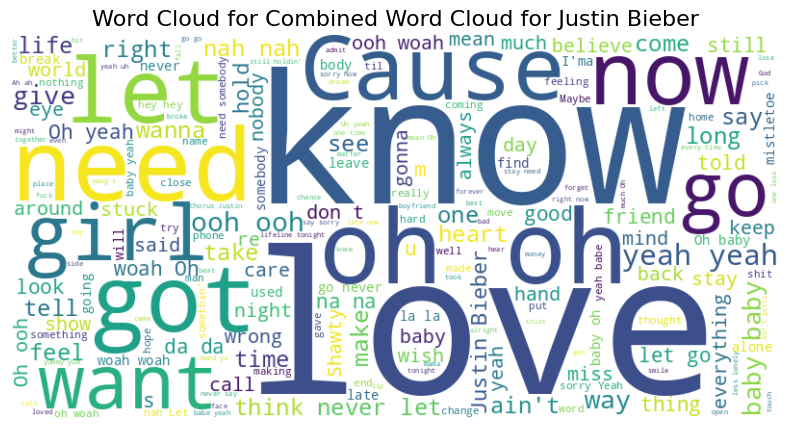


Processing all songs by Lady Gaga...
Found 1056 songs for Lady Gaga. Fetching lyrics...
Fetching lyrics for: 007 On You
Fetching lyrics for: 1000 Doves
Fetching lyrics for: 1000 Doves (Piano Demo)
Fetching lyrics for: 1000 Doves (Planningtorock Remix)
Fetching lyrics for: #1 Hit
Fetching lyrics for: 2000's & 2010's (Mash Up)
Fetching lyrics for: 3-Way (The Golden Rule)
Fetching lyrics for: 911
Fetching lyrics for: 911
Fetching lyrics for: 911 (AYONCTRL Remix)
Fetching lyrics for: 911 (Bruno Martini Extended Remix)
Fetching lyrics for: 911 (Bruno Martini Remix)
Fetching lyrics for: 911 (Charli XCX & A. G. Cook Remix)
Fetching lyrics for: 911 (Demo)
Fetching lyrics for: 911 (Madeon Remix)
Fetching lyrics for: 911 (Sofi Tukker Extended Remix)
Fetching lyrics for: 911 (Sofi Tukker Remix)
Fetching lyrics for: 911 (WEISS Remix)
Fetching lyrics for: Abracadabra*
Fetching lyrics for: ACT 2
Fetching lyrics for: ACT I BTWB
Fetching lyrics for: Again Again
Fetching lyrics for: Aimelovers
Fetchin

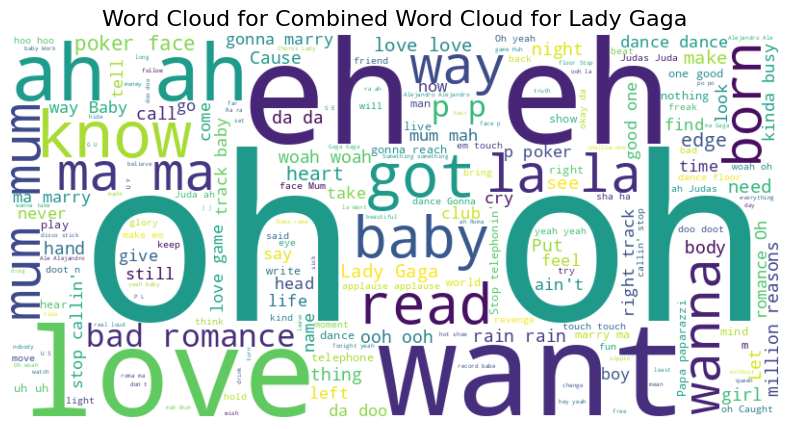


Processing all songs by The Weeknd...
Found 976 songs for The Weeknd. Fetching lyrics...
Fetching lyrics for: 6 Inch
Fetching lyrics for: 6 Inch Heel
Fetching lyrics for: 9TH GRADE
Fetching lyrics for: Acquainted
Fetching lyrics for: Adaptation
Fetching lyrics for: Adaptation
Fetching lyrics for: After Hours
Fetching lyrics for: After Hours (Live)
Fetching lyrics for: After Hours (Shish Boom Remix)
Fetching lyrics for: After Hours (The Blaze Remix)
Fetching lyrics for: After Hours Til Dawn Tour (Setlist)
Fetching lyrics for: After Life
Lyrics not found in the page structure.
Fetching lyrics for: Agile-Phone2676
Fetching lyrics for: Airports
Fetching lyrics for: A Lesser Man
Fetching lyrics for: A Lie
Fetching lyrics for: Allan Slaight Award Thank You Speech
Fetching lyrics for: All Day Love (Numb)
Fetching lyrics for: All I Know
Fetching lyrics for: All I Know (Demo)
Fetching lyrics for: All That Money (6 Inch Demo)
Fetching lyrics for: All to Myself
Fetching lyrics for: Alone Again
F

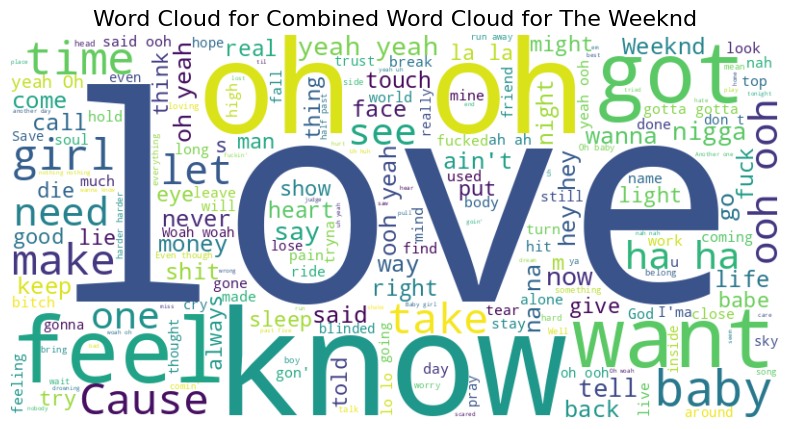

In [35]:
artists = ["Justin Bieber", "Lady Gaga", "The Weeknd"]
def get_artist_id(artist_name):

    base_url = "https://api.genius.com"
    headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}
    search_url = f"{base_url}/search"
    params = {"q": artist_name}

    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        hits = data['response']['hits']
        for hit in hits:
            if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
                return hit['result']['primary_artist']['id']
    return None

def get_artist_songs(artist_id):

    base_url = f"https://api.genius.com/artists/{artist_id}/songs"
    headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}
    params = {"per_page": 50, "page": 1}

    all_songs = []
    while True:
        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code != 200:
            print(f"Failed to fetch songs for artist ID {artist_id}")
            break
        data = response.json()
        songs = data['response']['songs']
        if not songs:
            break
        all_songs.extend(songs)
        params["page"] += 1

    return all_songs

for artist in artists:
    print(f"\nProcessing all songs by {artist}...")

    artist_id = get_artist_id(artist)
    if not artist_id:
        print(f"Could not find Genius ID for {artist}")
        continue

    songs = get_artist_songs(artist_id)
    if not songs:
        print(f"No songs found for {artist}")
        continue

    print(f"Found {len(songs)} songs for {artist}. Fetching lyrics...")

    combined_lyrics = ""
    for song in songs:
        song_title = song["title"]
        song_url = song["url"]
        print(f"Fetching lyrics for: {song_title}")
        lyrics = fetch_lyrics(song_url)
        if lyrics:
            lyrics = re.sub(r'\[.*?\]', '', lyrics)
            combined_lyrics += lyrics + " "

    print(f"Generating combined word cloud for {artist}...")
    generate_wordcloud(combined_lyrics, f"Combined Word Cloud for {artist}")
